# NLP Assignment 1 - Hidden Markov Models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
import collections
import csv

_Using ast (abstract syntax tree) library to parse each string_

In [2]:
def parse_dataset(fname):
  word_tag_dict = {}
  with open(fname, 'r') as file:
      reader = csv.reader(file)
      for row in reader:
          tuple_string = row[0] #Sentences in first column of csv.
          #Add a random word to the first line of the dataset if error occurs

          #Parsing with ast
          try:
              tuples_list = ast.literal_eval(tuple_string)
          except (SyntaxError, ValueError):
              print(f"Skipping row: {tuple_string}")
              continue

          #Adding word-tag pairs to dict
          for word, tag in tuples_list:
              word_tag_dict[word] = tag
  return word_tag_dict

In [3]:
def parse_test_data(fname):
  corpus = []
  with open(fname, 'r') as file:
      reader = csv.reader(file)
      for row in reader:
          tuple_string = row[0]
          try:
              tuples_list = ast.literal_eval(tuple_string)
              # print(tuples_list)
          except (SyntaxError, ValueError):
              print(f"Skipping row: {tuple_string}")
              continue

          """
            creating a corpus
              [
                ([word-list],[tag-list])
                .
                .
                .
                ([word-list],[tag-list])
              ]
          """
          word_list = []
          tag_list = []
          for word, tag in tuples_list:
            word_list.append(word)
            tag_list.append(tag)
          corpus.append((word_list, tag_list))
  return corpus




In [4]:
word_tag_dict = parse_dataset('TRAIN-DATA.csv')
print(len(word_tag_dict))

Skipping row: [('These', 'DET'), ('are', 'VERB'), ('made', 'VERB'), ('on', 'ADP'), ('special', 'ADJ'), ('order', 'NOUN'), ('only', 'ADV'), (',', '.'), ('in', 'ADP'), ('Kodiak', 'NOUN'), ('grade', 'NOUN'), ('(', '.'), ('about', 'ADV'), ('$310', 'NOUN'), (')', '.'), (',', '.'), ('with', 'ADP'), ('integral', 'ADJ'), ('muzzle', 'NOUN'), ('brakes', 'NOUN'), ('and', 'CONJ'), ('heavy', 'ADJ'), ('rubber', 'NOUN'), ('recoil', 'NOUN'), ('pads', 'NOUN'), (';', '.'), ('
22468


In [5]:
corpus = parse_test_data('TEST-DATA.csv')
print(len(corpus))
print(corpus[:5])

Skipping row: [('However', 
8762
[(['DF'], ['PROPN']), (['03/01/2001', '01:35', 'PM'], ['NUM', 'NUM', 'NOUN']), (['The', 'industry', 'has', 'said', '1960', 'was', 'a', 'poor', 'year', '.'], ['DET', 'NOUN', 'VERB', 'VERB', 'NUM', 'VERB', 'DET', 'ADJ', 'NOUN', '.']), (['Love', 'this', 'place', '!!'], ['VERB', 'DET', 'NOUN', 'PUNCT']), (['This', 'problem', 'of', 'the', 'optimum', 'balance', 'in', 'the', 'relative', 'numbers', 'of', 'generalists', 'and', 'specialists', 'can', 'be', 'investigated', 'on', 'a', 'communicative', 'network', 'basis', '.'], ['DET', 'NOUN', 'ADP', 'DET', 'ADJ', 'NOUN', 'ADP', 'DET', 'ADJ', 'NOUN', 'ADP', 'NOUN', 'CONJ', 'NOUN', 'VERB', 'VERB', 'VERB', 'ADP', 'DET', 'ADJ', 'NOUN', 'NOUN', '.'])]


In [6]:
train_corpus= parse_test_data('TRAIN-DATA.csv')
print(len(train_corpus))
print(train_corpus[:5])
type(train_corpus)

Skipping row: [('These', 'DET'), ('are', 'VERB'), ('made', 'VERB'), ('on', 'ADP'), ('special', 'ADJ'), ('order', 'NOUN'), ('only', 'ADV'), (',', '.'), ('in', 'ADP'), ('Kodiak', 'NOUN'), ('grade', 'NOUN'), ('(', '.'), ('about', 'ADV'), ('$310', 'NOUN'), (')', '.'), (',', '.'), ('with', 'ADP'), ('integral', 'ADJ'), ('muzzle', 'NOUN'), ('brakes', 'NOUN'), ('and', 'CONJ'), ('heavy', 'ADJ'), ('rubber', 'NOUN'), ('recoil', 'NOUN'), ('pads', 'NOUN'), (';', '.'), ('
8760
[(['03/01/2001', '01:35', 'PM'], ['NUM', 'NUM', 'NOUN']), (['The', 'industry', 'has', 'said', '1960', 'was', 'a', 'poor', 'year', '.'], ['DET', 'NOUN', 'VERB', 'VERB', 'NUM', 'VERB', 'DET', 'ADJ', 'NOUN', '.']), (['Love', 'this', 'place', '!!'], ['VERB', 'DET', 'NOUN', 'PUNCT']), (['This', 'problem', 'of', 'the', 'optimum', 'balance', 'in', 'the', 'relative', 'numbers', 'of', 'generalists', 'and', 'specialists', 'can', 'be', 'investigated', 'on', 'a', 'communicative', 'network', 'basis', '.'], ['DET', 'NOUN', 'ADP', 'DET', 'AD

list

_Building Vocabulary_

In [7]:
words = set()
tags = set()
vocab = {}
for tup in train_corpus:
  words.update(tup[0])
  tags.update(tup[1])
#word tag pair dictionary
for tup in train_corpus:
  for word, tag in zip(tup[0], tup[1]):
    vocab[(word, tag)] = vocab.get((word, tag), 0) + 1

In [8]:
print(len(words))
print(len(tags))
print(words)
print(tags)
print(vocab)

22468
21
{'Says', 'better', 'FOR', 'Lavorato', 'towne', "Ginsberg's", 'one-tenth', 'species', 'Corp.', 'contend', 'TO', 'loom', 'Harmful', 'bisque', 'differentiated', 'generate', 'explaining', 'village', 'Caribbean', 'audible', 'dagers', 'bedding', 'smaller', 'meowing', 'three-dimensionality', 'diagnostic', 'departed', 'Pictures', 'June', 'Zacarias', 'above-noted', 'choking', 'Shayne', 'acquire', 'Bartol', 'overwhelmed', 'Better', 'offensive', 'experience', 'Rhythmic', "Pliny's", 'wisdom', 'surmises', 'actives', 'leadership', 'Osler', 'Everything', 'Cheryl', 'alienating', 'sexes', 'fears', 'Moscow', 'children', 'planets', 'Newton', 'resin-saturated', 'money-winner', 'convenient', 'automation', 'Sleepily', 'Jet', 'Drop', 'thereto', 'patriotism', 'Jenkins', 'buzzing', 'mystified', 'timber', 'shitty', 'wangs', 'wolf', 'entourage', 'Northeast', 'glance', 'hesitate', 'oily', 'sniffed', 'speculators', 'nigger', 'Amnesty', 'ladder', 'consign', 'parade', 'scoring', 'Story', 'Handy', '***', 'co

_Plotting graph for frequencies of tags_

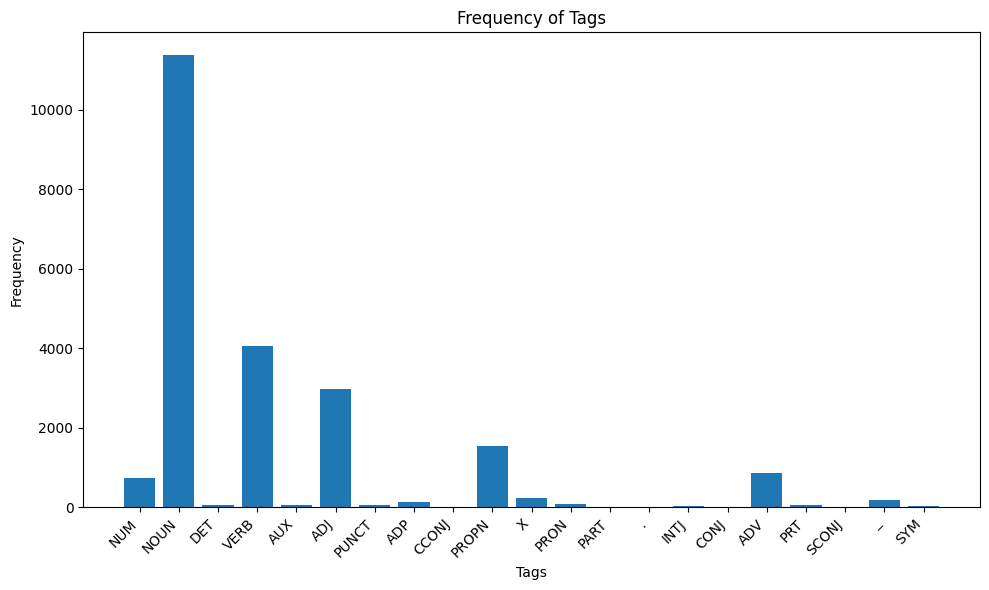

In [9]:
# Count the frequency of each tag
tag_frequencies = collections.Counter(word_tag_dict.values())

# Create the histogram
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.bar(tag_frequencies.keys(), tag_frequencies.values())
plt.xlabel('Tags')
plt.ylabel('Frequency')
plt.title('Frequency of Tags')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

_Estimating HMM Parameters_

In [10]:
#tag count
tag_count = {}
for (word, tag), count in vocab.items():
    tag_count[tag] = tag_count.get(tag, 0) + count

#Emmision Probability
emission_prob = {}
for (word, tag), count in vocab.items():
    emission_prob[(word, tag)] = count / tag_count[tag]

for t in list(emission_prob.keys())[:5]:
    print(f"{t}: {emission_prob[t]}")

('03/01/2001', 'NUM'): 0.0003417634996582365
('01:35', 'NUM'): 0.0003417634996582365
('PM', 'NOUN'): 0.0004505293720121142
('The', 'DET'): 0.054903995848469125
('industry', 'NOUN'): 0.0006007058293494857


In [11]:
tag_sum ={}
for (word, tag), prob in emission_prob.items():
    tag_sum[tag] = tag_sum.get(tag, 0) + prob

for t in list(tag_sum.keys())[:5]:
    print(f"{t}: {tag_sum[t]}")

NUM: 0.9999999999999825
NOUN: 0.9999999999996559
DET: 0.9999999999999999
VERB: 0.999999999999943
ADJ: 0.9999999999999462


In [12]:
#Transition Probability
trans_count = {}
transition_prob = {}

for tup in train_corpus:
    prev_tag = None
    for tag in tup[1]:
        if prev_tag is not None:
            trans_count.setdefault(prev_tag, {}).setdefault(tag, 0)
            trans_count[prev_tag][tag] += 1
        prev_tag = tag

for prev_tag, tag_counts in trans_count.items():
    transition_prob[prev_tag] = {}
    total_transitions = sum(tag_counts.values())
    for tag, count in tag_counts.items():
        transition_prob[prev_tag][tag] = count / total_transitions

In [13]:
for tag, tag_probs in transition_prob.items():
    total = sum(tag_probs.values())
    print(f"{tag}: {total}")

NUM: 1.0
DET: 1.0
NOUN: 1.0
VERB: 1.0
ADJ: 0.9999999999999999
ADP: 0.9999999999999999
CONJ: 0.9999999999999999
PROPN: 1.0
X: 1.0
PRON: 0.9999999999999999
ADV: 1.0000000000000002
.: 1.0000000000000002
AUX: 1.0
INTJ: 1.0
PUNCT: 1.0
CCONJ: 0.9999999999999998
PRT: 0.9999999999999999
PART: 1.0000000000000004
SCONJ: 0.9999999999999999
_: 1.0
SYM: 0.9999999999999997


In [14]:
#Initial Probability
initial_prob = {}
initial_count = {}

for tup in train_corpus:
    first_tag = tup[1][0]
    initial_count[first_tag] = initial_count.get(first_tag, 0) + 1

sentences = sum(initial_count.values())

for tag, count in initial_count.items():
    initial_prob[tag] = count / sentences

In [15]:
for t in list(initial_prob.keys())[:5]:
        print(f"{t}: {initial_prob[t]}")

NUM: 0.021575342465753426
DET: 0.19486301369863013
VERB: 0.04680365296803653
PROPN: 0.04098173515981735
PRON: 0.16278538812785387


In [26]:
tag_list = list(tags)
tag_list

['_',
 'NOUN',
 'PRON',
 'PROPN',
 'X',
 'PART',
 'DET',
 'AUX',
 '.',
 'NUM',
 'PRT',
 'ADJ',
 'ADP',
 'ADV',
 'VERB',
 'CONJ',
 'SCONJ',
 'PUNCT',
 'INTJ',
 'CCONJ',
 'SYM']

In [32]:
print(len(initial_prob.keys()))
print(len(transition_prob.keys()))
print(len(emission_prob.keys()))
print(emission_prob.keys())

21
21
24814
dict_keys([('03/01/2001', 'NUM'), ('01:35', 'NUM'), ('PM', 'NOUN'), ('The', 'DET'), ('industry', 'NOUN'), ('has', 'VERB'), ('said', 'VERB'), ('1960', 'NUM'), ('was', 'VERB'), ('a', 'DET'), ('poor', 'ADJ'), ('year', 'NOUN'), ('.', '.'), ('Love', 'VERB'), ('this', 'DET'), ('place', 'NOUN'), ('!!', 'PUNCT'), ('This', 'DET'), ('problem', 'NOUN'), ('of', 'ADP'), ('the', 'DET'), ('optimum', 'ADJ'), ('balance', 'NOUN'), ('in', 'ADP'), ('relative', 'ADJ'), ('numbers', 'NOUN'), ('generalists', 'NOUN'), ('and', 'CONJ'), ('specialists', 'NOUN'), ('can', 'VERB'), ('be', 'VERB'), ('investigated', 'VERB'), ('on', 'ADP'), ('communicative', 'ADJ'), ('network', 'NOUN'), ('basis', 'NOUN'), ('Esso', 'PROPN'), ('0', 'X'), ('Whiting', 'PROPN'), ('field', 'NOUN'), ('started', 'VERB'), ('production', 'NOUN'), ('Tuesday', 'PROPN'), ('.', 'X'), ('He', 'PRON'), ('drew', 'VERB'), ('deep', 'ADJ'), ('breath', 'NOUN'), ('Each', 'DET'), ('side', 'NOUN'), ('litany', 'NOUN'), ('recommendations', 'NOUN'), (

In [21]:
def viterbi(sentence, tag_list, transition_matrix, emission_matrix, intial_prob):
  N = len(tag_list)
  T = len(sentence)

  #intializing the viterbi and backptr matrix
  viterbi = np.empty((N, T))
  backptr = np.zeros((N, T), dtype=int)

  #initializing
  for i in range(N):
    viterbi[i, 0] = intial_prob[tag_list[i]] * emission_matrix[tag_list[i]].get(sentence[0], 0)
  print(viterbi)
  print(backptr)
  # print(viterbi.shape)
  # print(backptr.shape)

  #state probability calculation
  for t in range(1, T):
    for j, label  in enumerate(tag_list):
      temp = viterbi[:, t-1] * transition_matrix[:,j] * emission_matrix[label].get(sentence[t], 0)
      viterbi[j, t] = np.max(temp)
      backptr[j, t] = np.argmax(temp)

  # computing best pos tags using backtracking
  pos_tags = []
  best_tag = np.argmax(viterbi[:, -1])
  pos_tags.append(tag_list[best_tag])
  for t in range(T-1, 0, -1):
    best_tag = backptr[best_tag, t]
    pos_tags.append(tag_list[best_tag])
  pos_tags.reverse()
  return pos_tags

In [24]:
print(len(corpus[1][0]))
print(corpus[1][0])
print(len(corpus[1][1]))


3
['03/01/2001', '01:35', 'PM']
3


In [19]:
def convert_probility_dict_to_df(prob_dict, orderlist):
  df = pd.DataFrame(prob_dict).loc[orderlist, orderlist]
  return df
tran_df = convert_probility_dict_to_df(transition_prob, tag_list)
tran_df.fillna(0, inplace=True)
# emmision_df = convert_probility_dict_to_df(emission_prob, tag_list)
# emmision_df.fillna(0, inplace=True)
tran_df.head()
# emmision_df.head()
transition_matrix = tran_df.to_numpy()

In [23]:
pos = viterbi(corpus[1][0], tag_list, transition_matrix, emission_prob, initial_prob)

KeyError: '_'

In [ ]:
import pandas as pd

# Example nested dictionary
data_dict = {
    'A': {'A': 1, 'B': 2},
    'B': {'A': 2, 'B': 4}
}

# List of keys to order the DataFrame
key_list = ['B', 'A']

# Convert the nested dictionary to a DataFrame
df = pd.DataFrame(data_dict)

# Reorder the DataFrame according to the key_list
df = df.loc[key_list, key_list]

print(df)
